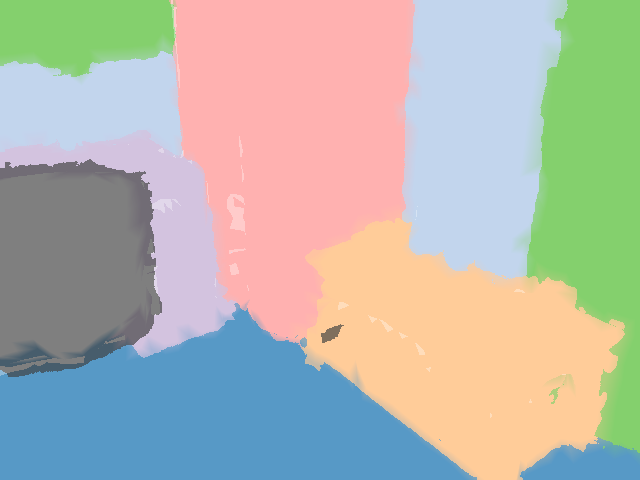

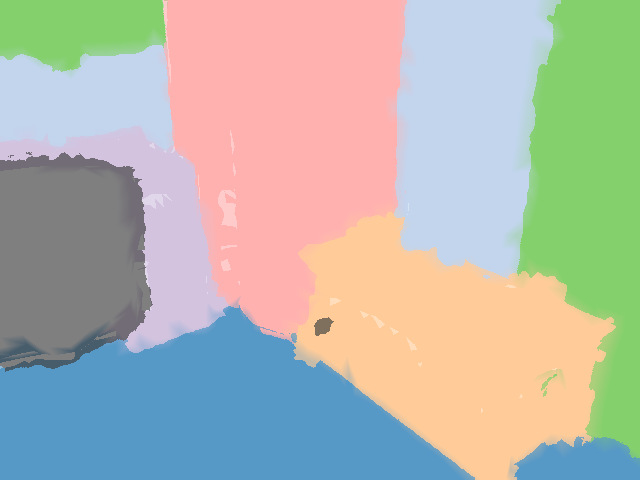

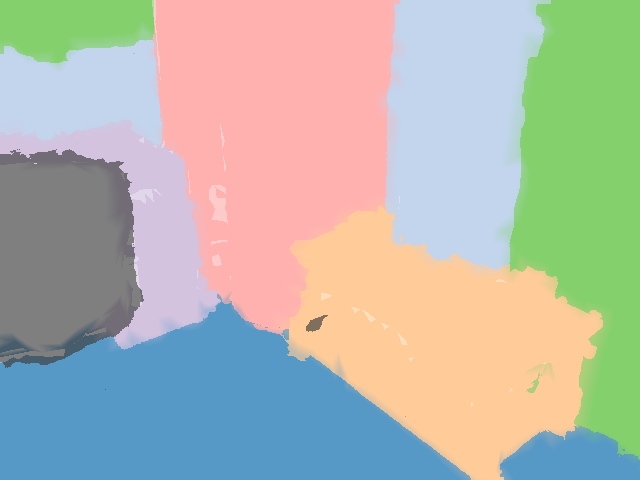

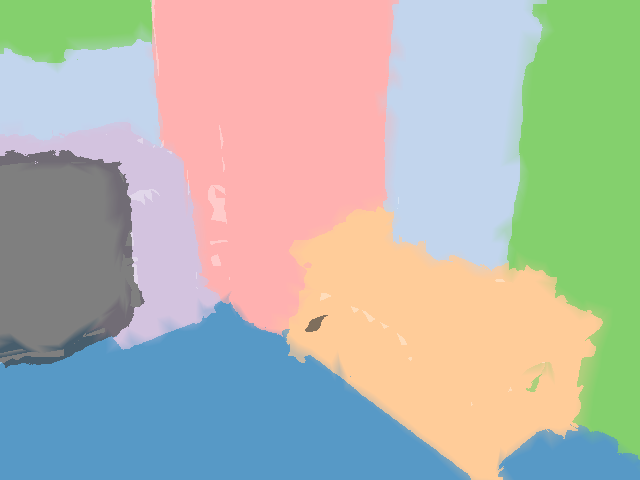

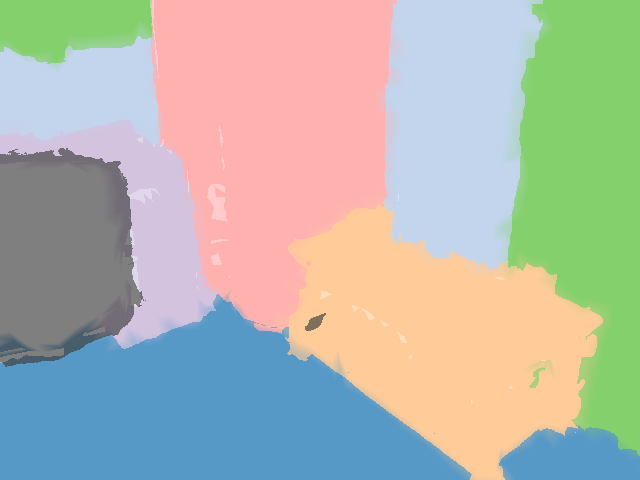

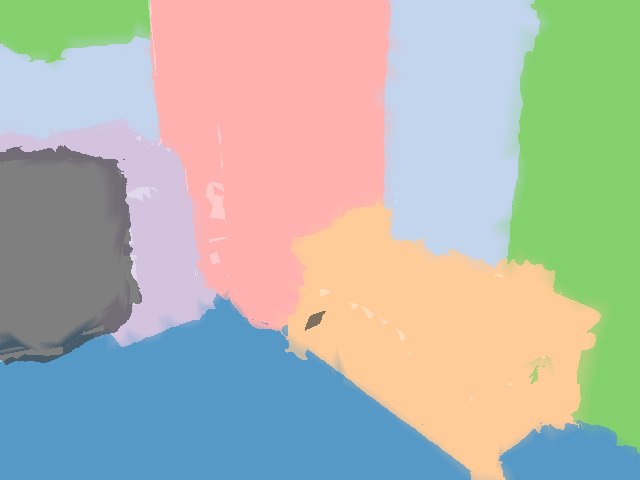

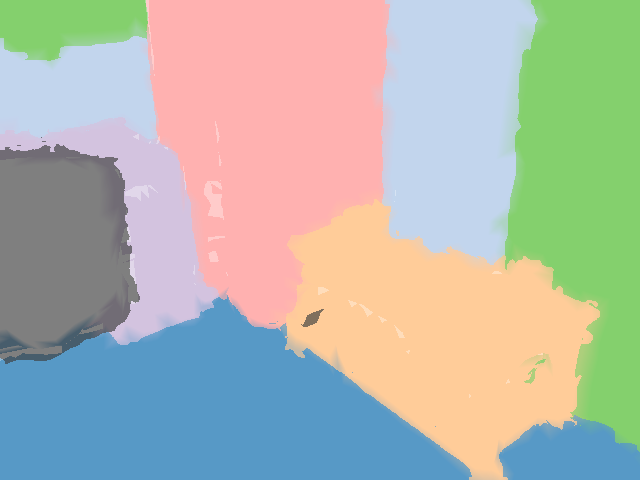

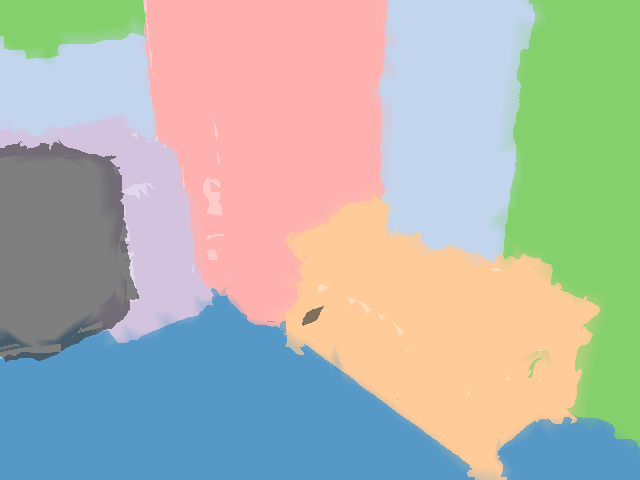

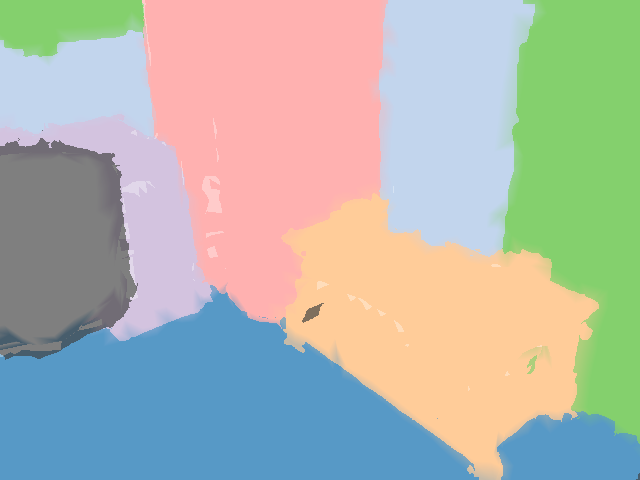

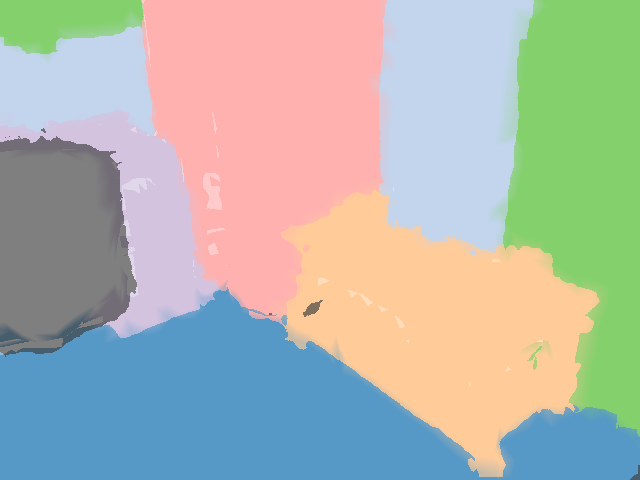

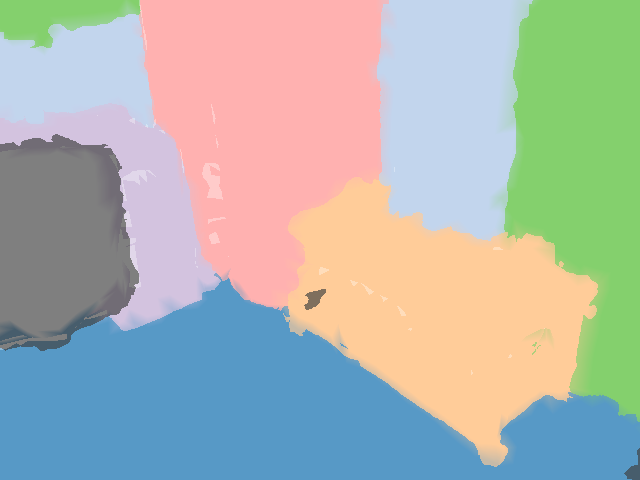

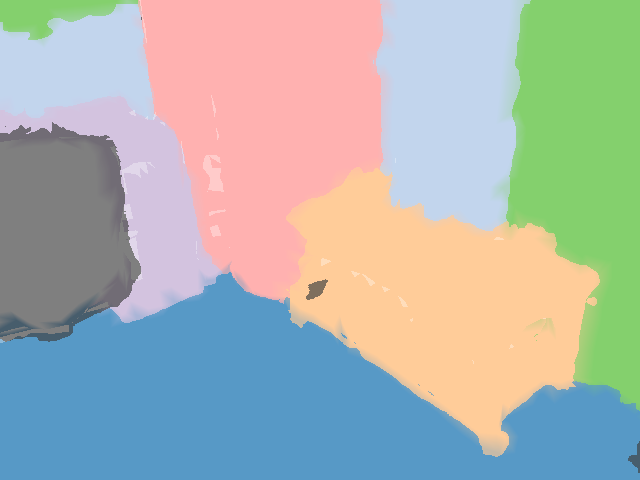

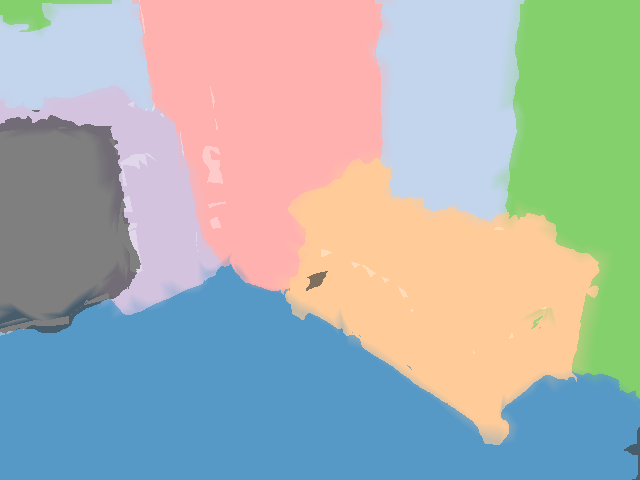

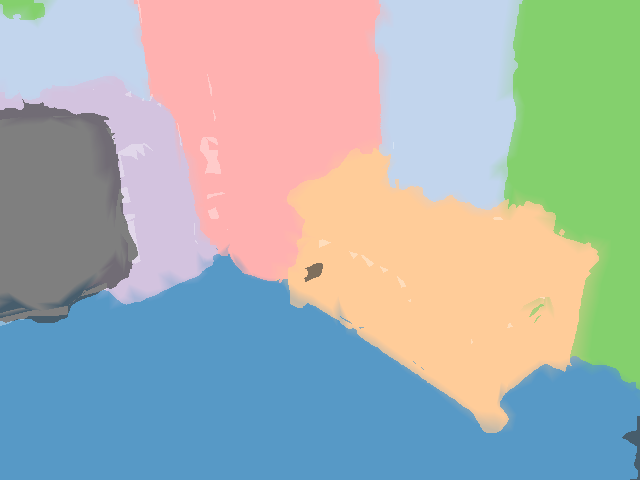

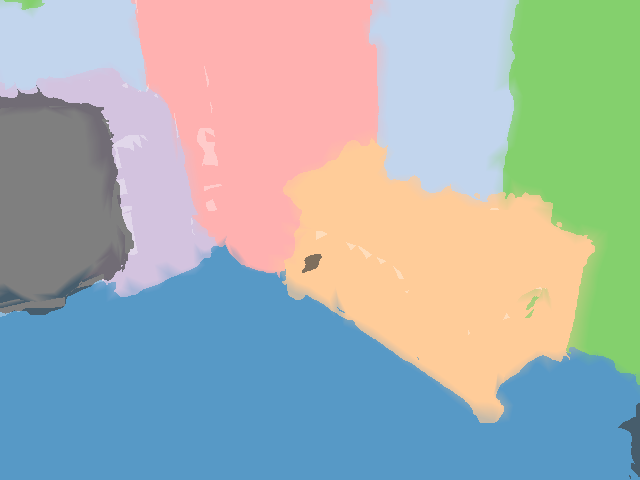

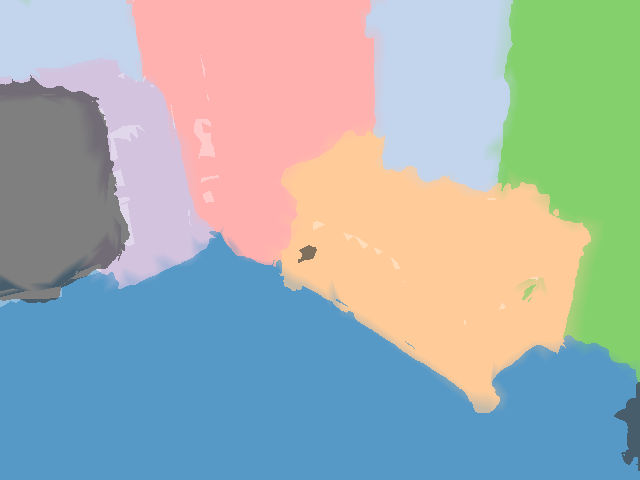

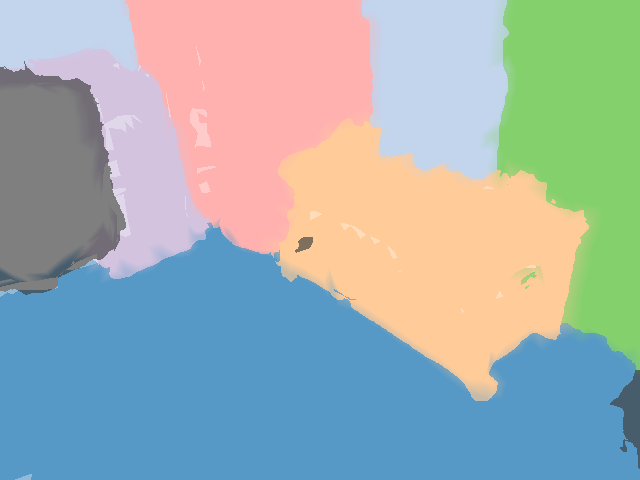

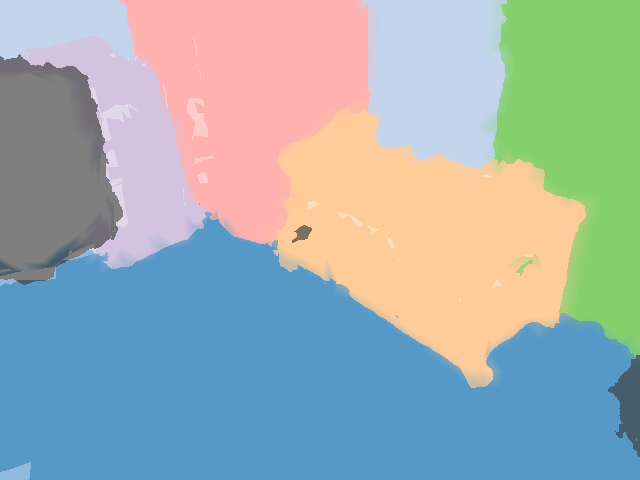

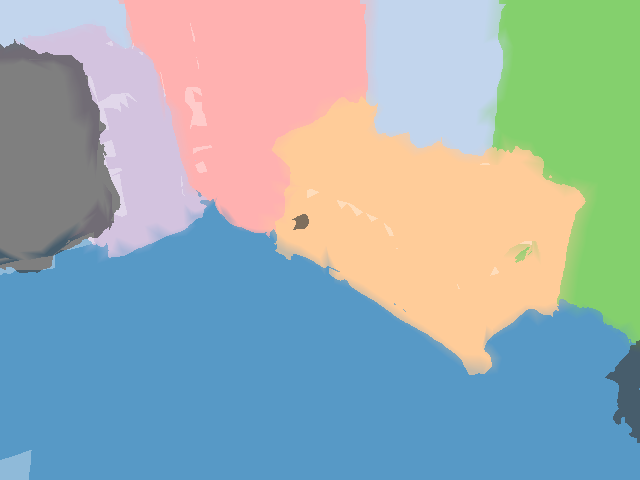

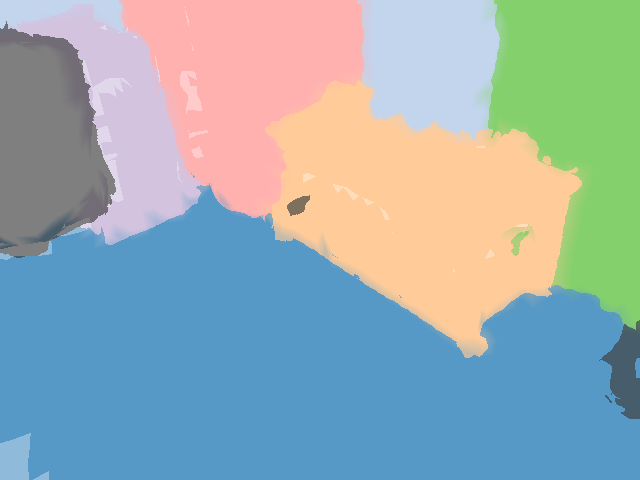

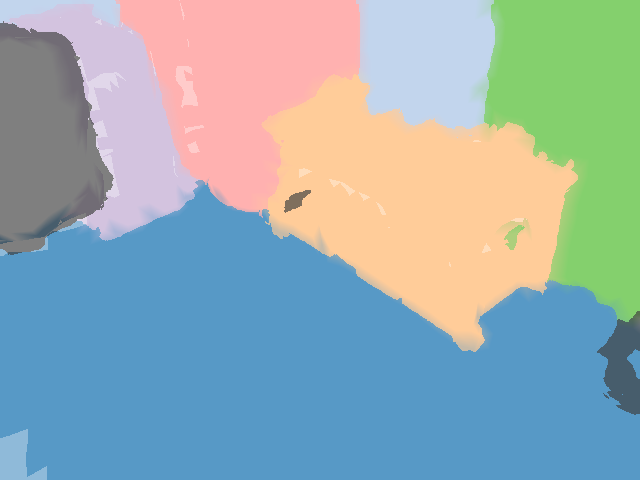

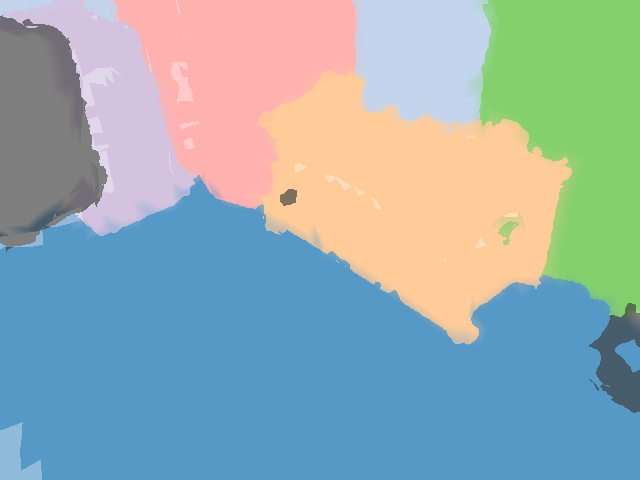

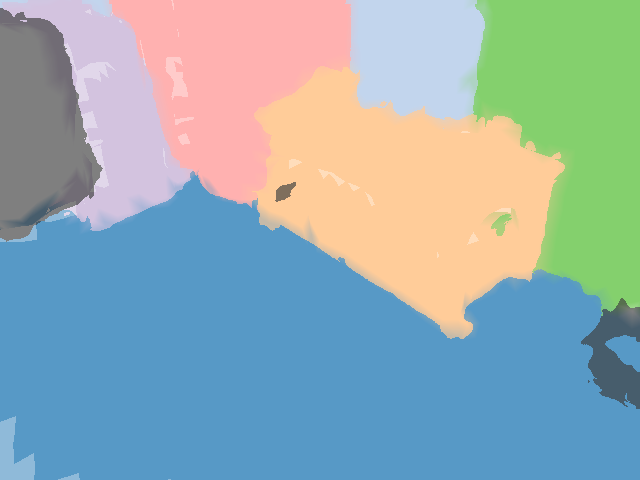

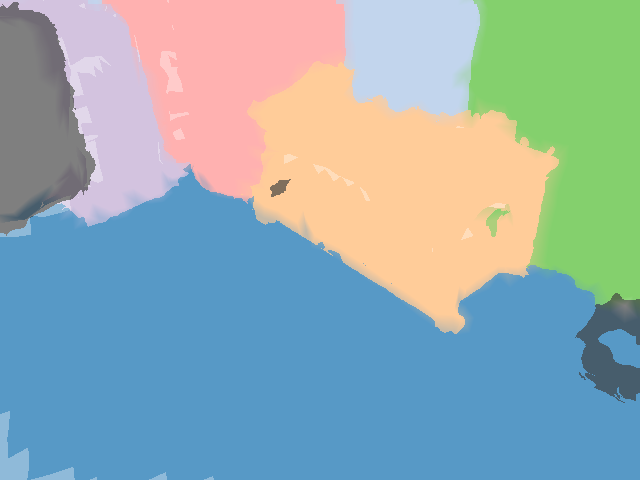

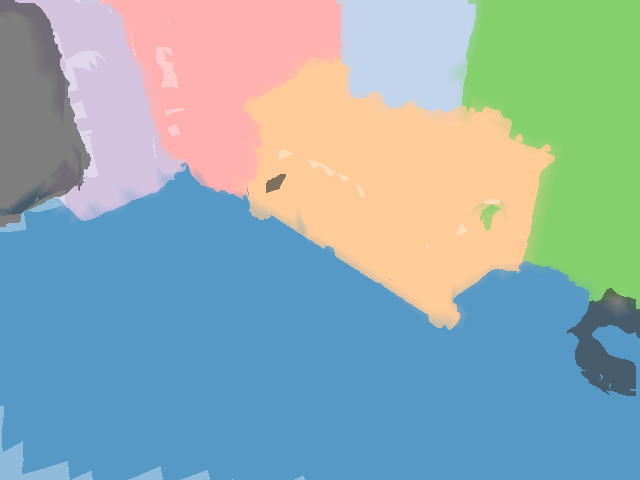

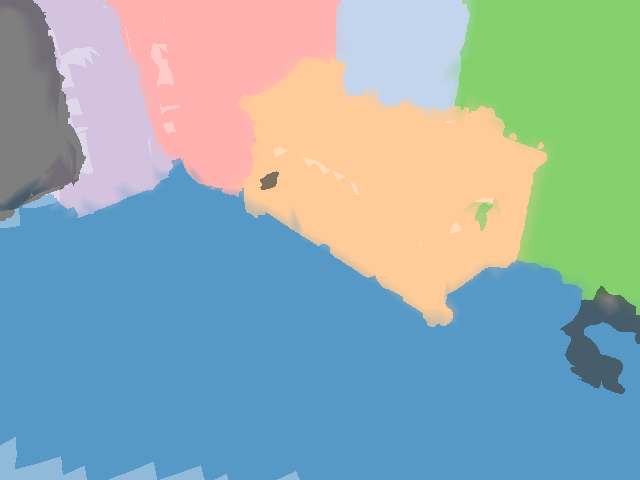

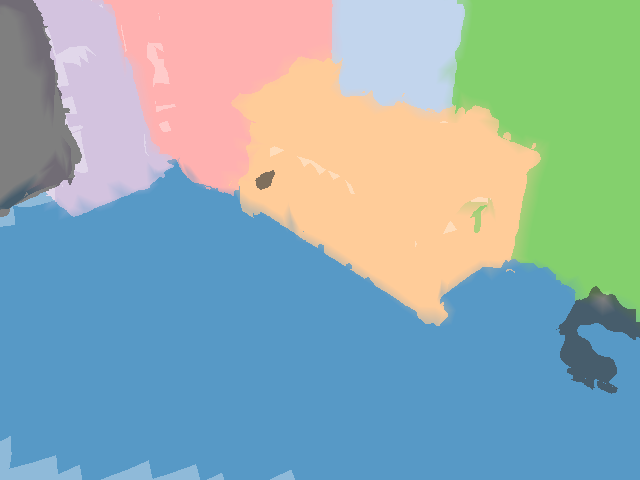

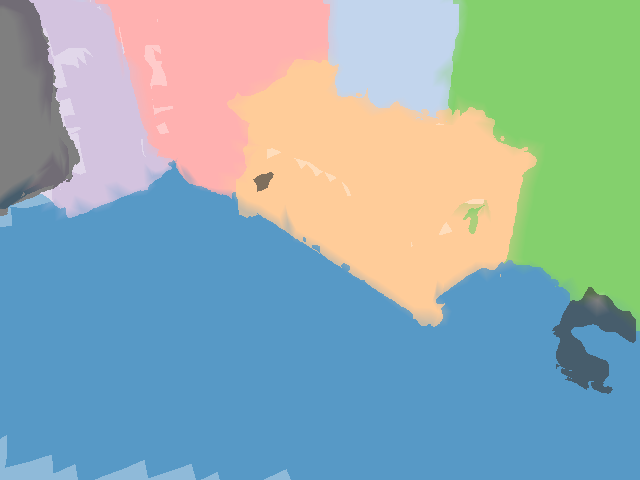

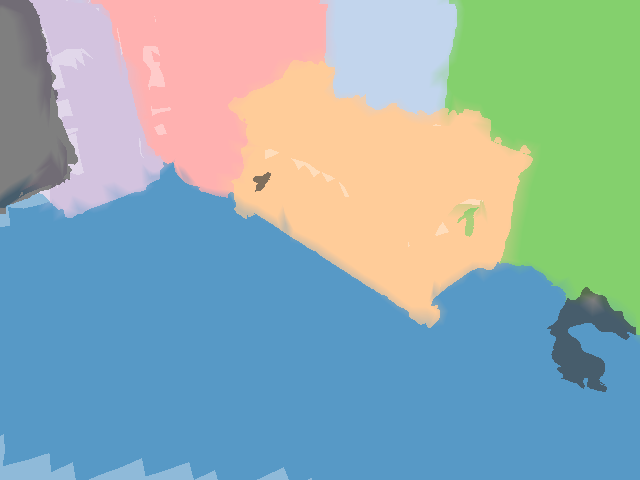

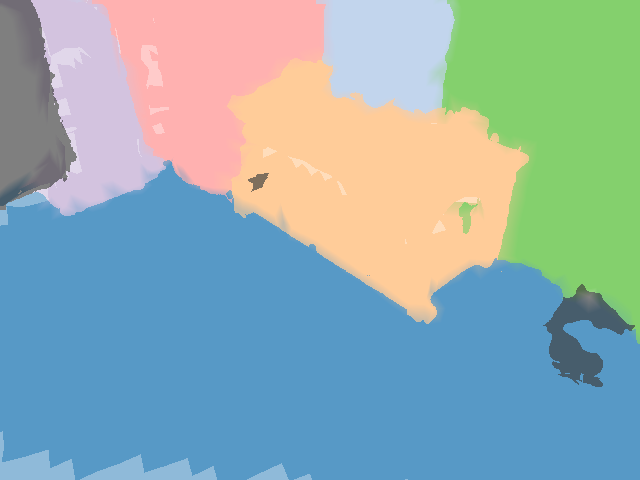

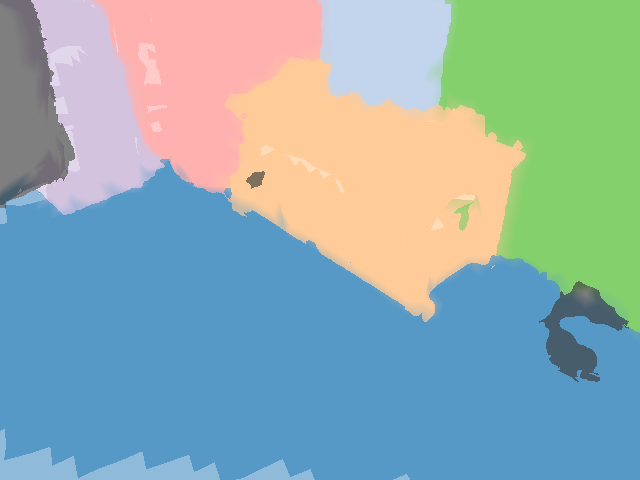

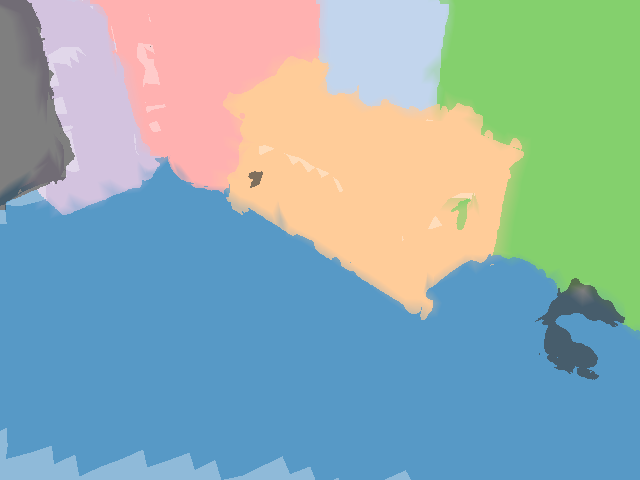

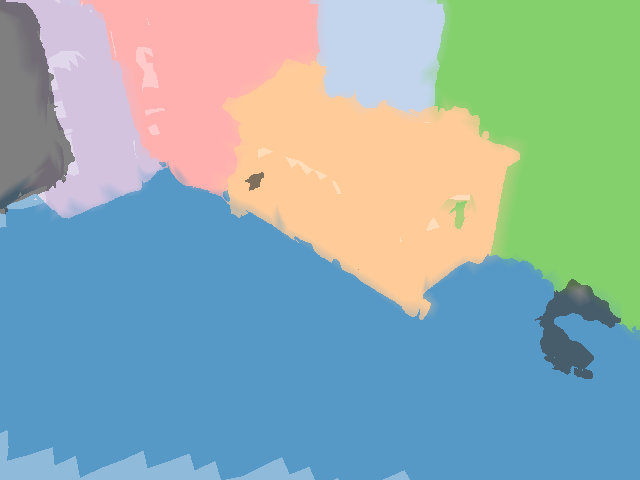

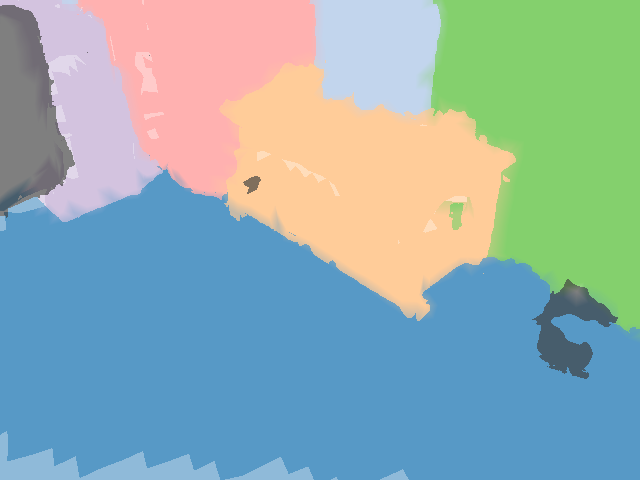

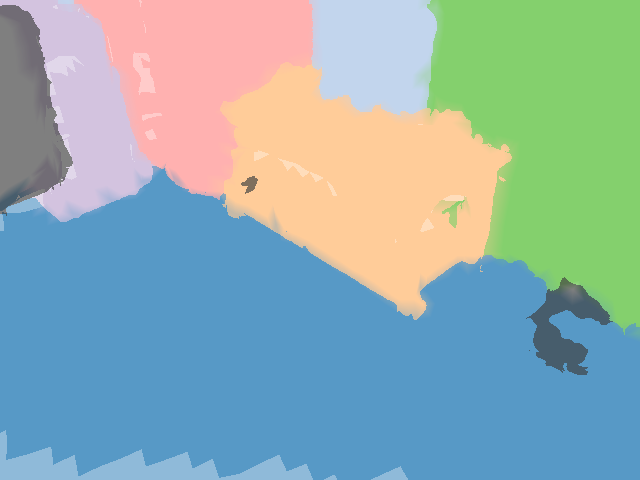

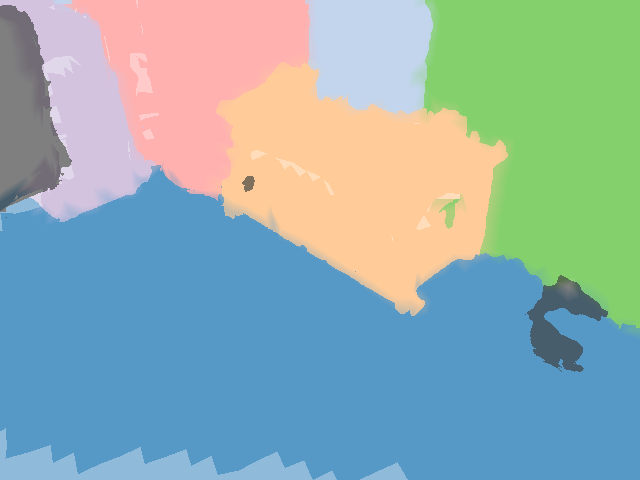

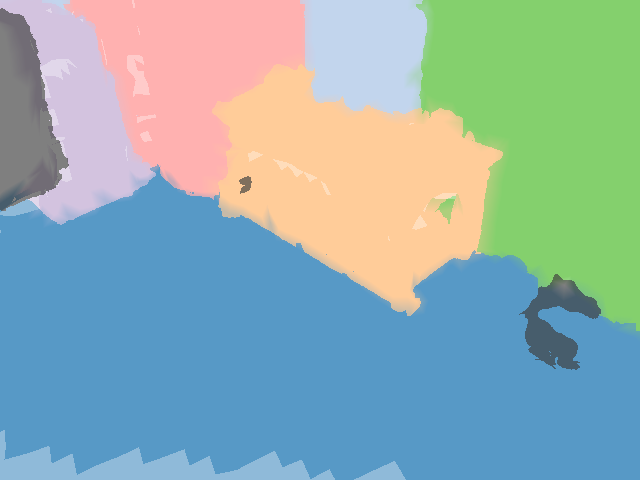

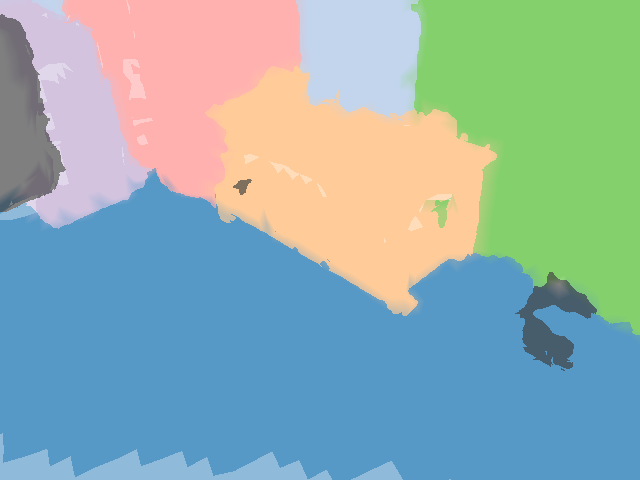

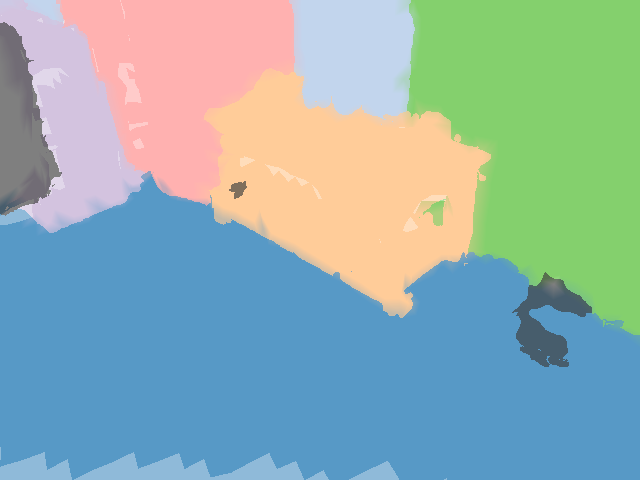

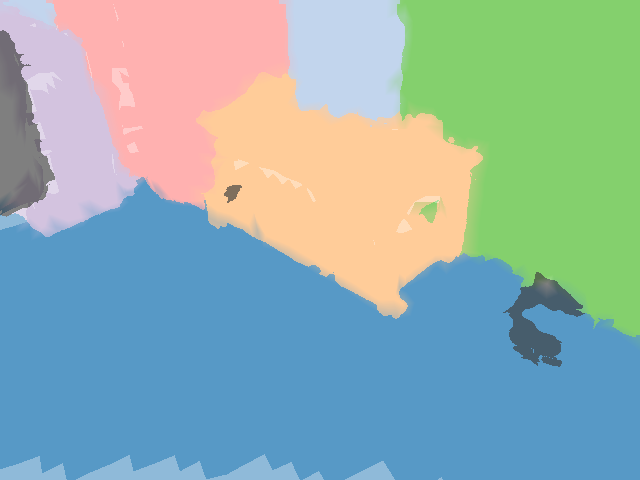

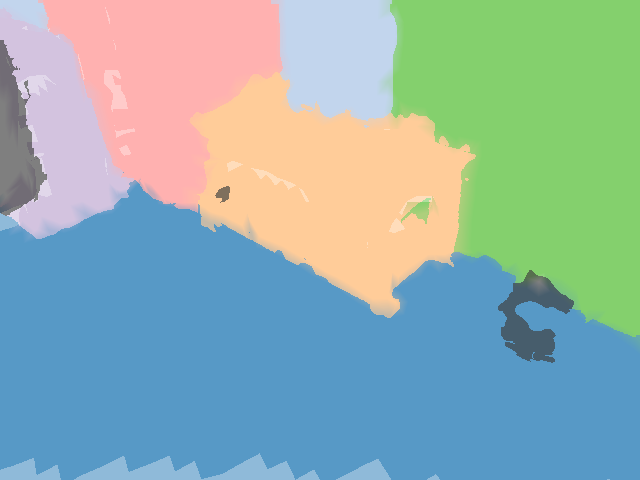

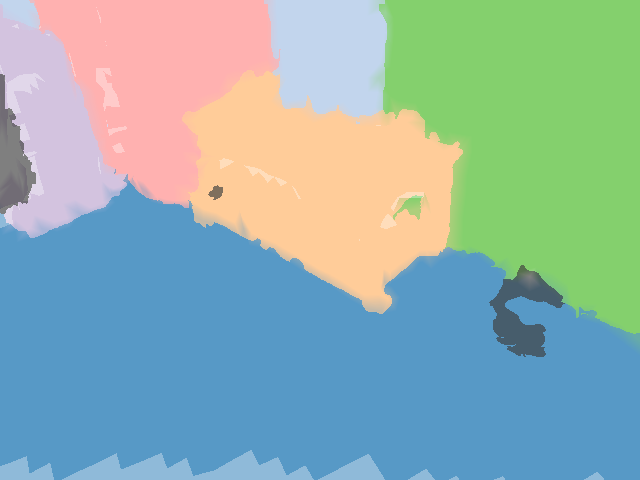

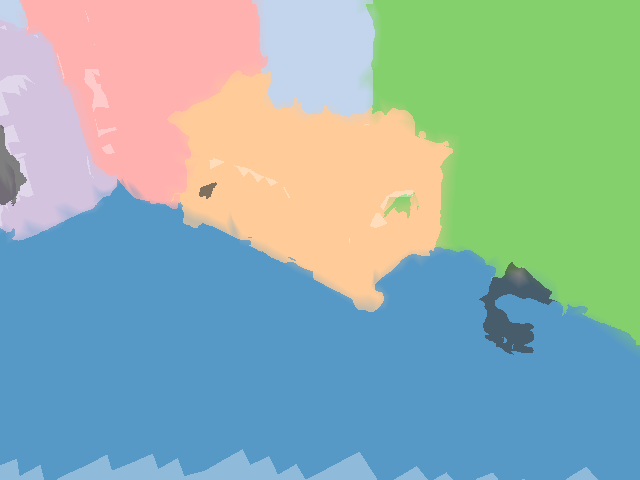

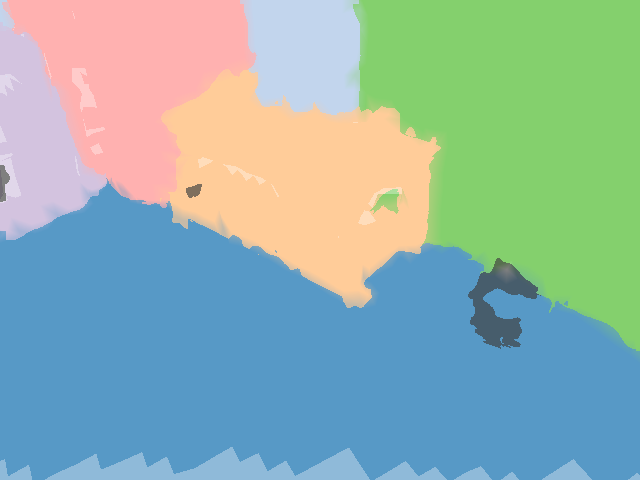

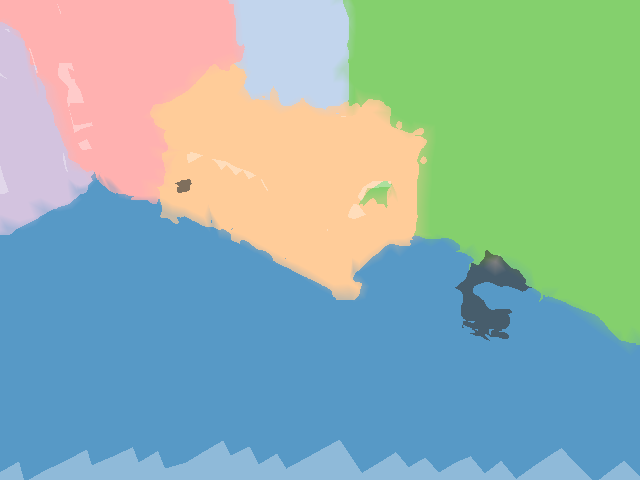

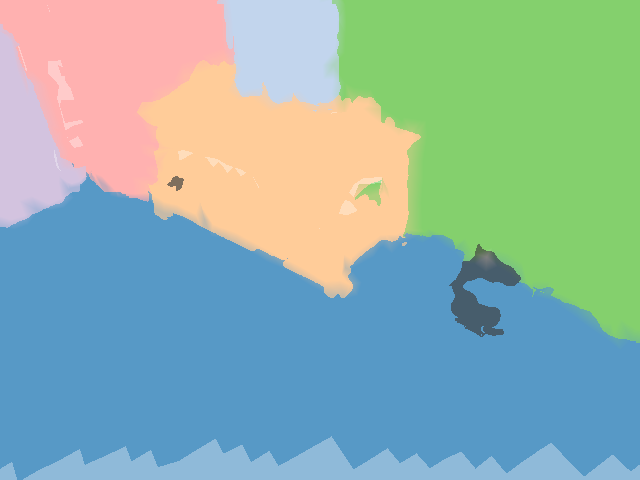

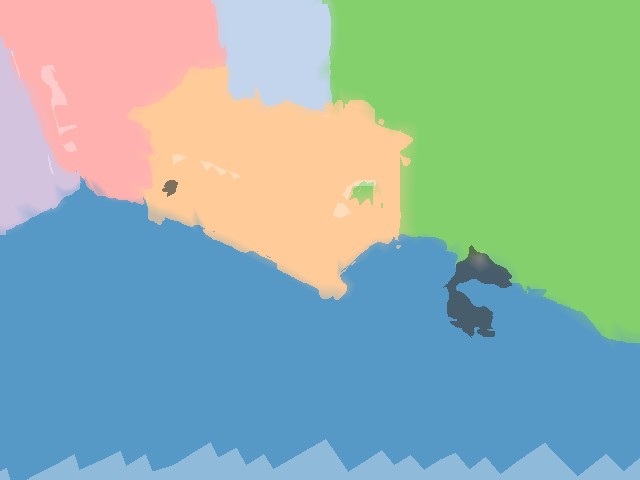

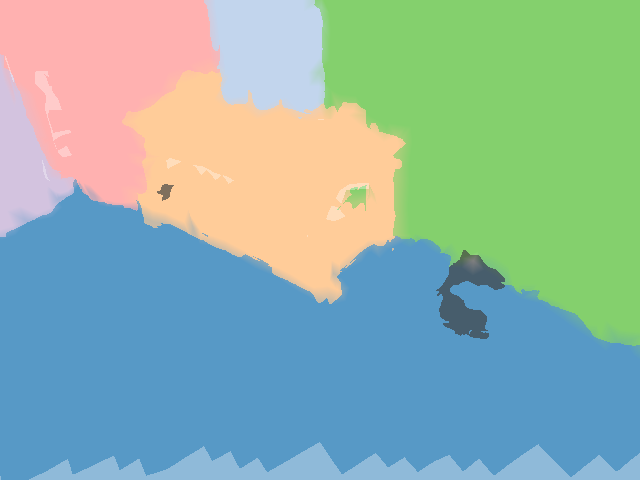

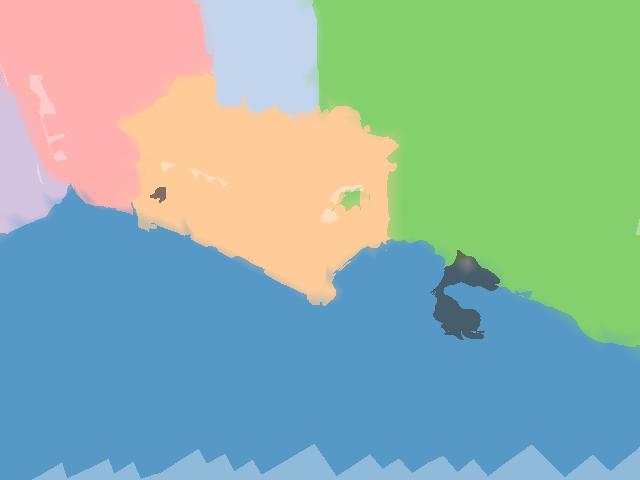

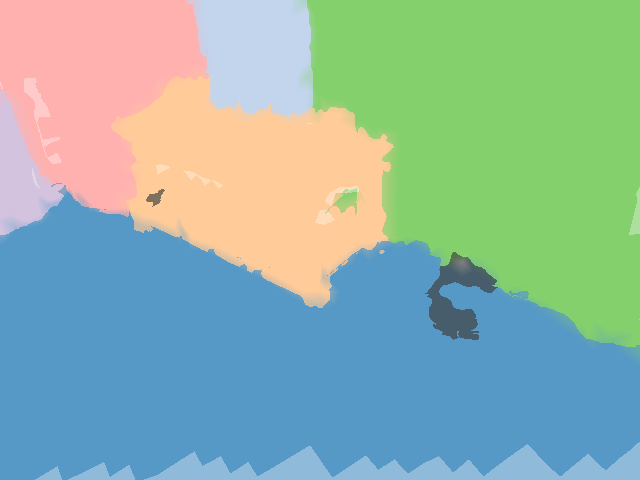

In [11]:
import numpy as np
import imageio 
from PIL import Image
import cv2 as cv

for n in range(50):
    depth = imageio.imread(f"/home/jonas/Documents/Repos/tsdf-fusion-python/data/scene0000_00/depth/{n}.png")
    sem = imageio.imread(f"/home/jonas/Documents/Repos/tsdf-fusion-python/data/scene0000_00/label-filt/{n}.png")
    img = imageio.imread(f"/home/jonas/Documents/Repos/tsdf-fusion-python/data/scene0000_00/color/{n}.jpg")
    mapping = np.genfromtxt('/home/jonas/catkin_ws/src/Kimera-Interfacer/kimera_interfacer/cfg/nyu40_segmentation_mapping.csv' , delimiter=',')
    ids = mapping[1:, 5]
    rgb = mapping[1:, 1:4]
    sem_new = np.zeros( (sem.shape[0], sem.shape[1], 3) )
    for i in range(0,41):
        sem_new[sem == i, :3] = rgb[i]
    sem_new = np.uint8( sem_new )


    H, W = depth.shape[0], depth.shape[1] # 640, 1280

    depth = cv.resize(depth, dsize=(W, H), interpolation=cv.INTER_NEAREST)
    sem_new = cv.resize(sem_new, dsize=(W, H), interpolation=cv.INTER_NEAREST)
    img = cv.resize(img, dsize=(W, H), interpolation=cv.INTER_CUBIC)

    i1 =  Image.fromarray(np.uint8( sem_new ) ).convert('RGBA')

    i2 = Image.fromarray(np.uint8( depth/10 ) ).convert('RGBA')

    i1.putalpha(255)
    i2.putalpha(0)
    Image.alpha_composite( i2, i1)
    img2 = imageio.imread(f"/home/jonas/catkin_ws/src/Kimera-Interfacer/kimera_interfacer/scripts/init_{n}.png")

    i3 = Image.fromarray(np.uint8( img2 ) ).convert('RGBA')
    i1.putalpha(127)
    i3.putalpha(127)
    display( Image.alpha_composite(i3, i1) )


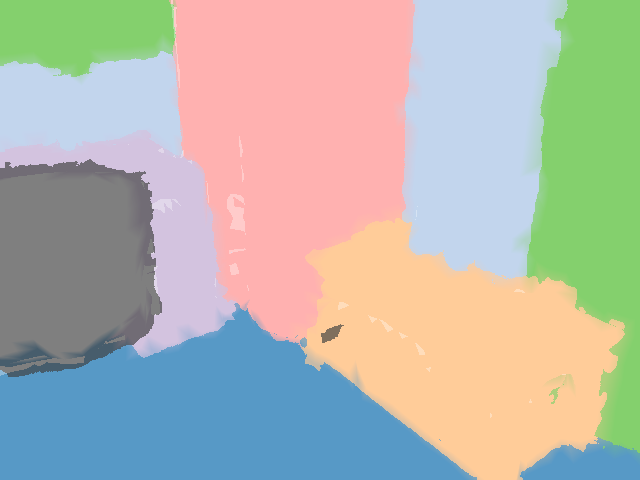

In [6]:
sem

Array([[21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       ...,
       [ 3,  3,  3, ..., 63, 63, 63],
       [ 3,  3,  3, ..., 63, 63, 63],
       [ 3,  3,  3, ..., 63, 63, 63]], dtype=uint16)